In [14]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes

import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
from sklearn import cluster
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hca
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import fcluster
from pylab import *



In [23]:
data = pd.read_csv("data/results/meteorites_unweighted.csv", index_col=0)
data = data.drop(columns=["id","recclass", "weights","lvl3","lvl4"])
data.head()

,mass,fell_found,year,latitude,longitude,group,chondrite,type,lc_sample
1,21.0,Fell,1880,50.77500,6.08333,L,Chondrite,Stony,11
2,720.0,Fell,1951,56.18333,10.23333,H,Chondrite,Stony,1
3,331.0,Found,1982,26.80000,-105.41667,H,Chondrite,Stony,2
4,21100.0,Found,1951,36.30000,-104.28333,H,Chondrite,Stony,13
5,107000.0,Fell,1952,54.21667,-113.00000,EH,Chondrite,Stony,1


In [31]:
data_NaN = data[data.isna().any(axis=1)]
data_NaN

,mass,fell_found,year,latitude,longitude,group,chondrite,type,lc_sample
415,367.0,Fell,1769,50.66667,2.33333,Unknown,NaN,NaN,1
479,2700.0,Fell,1880,26.58333,85.56667,Stony,NaN,Stony,1
539,367.0,Found,1954,22.75000,51.16667,Stony,NaN,Stony,14
819,2400.0,Fell,1916,11.75000,122.33333,Stony,NaN,Stony,1
902,367.0,Fell,1791,43.35000,11.50000,Stony,NaN,Stony,11
905,15000.0,Fell,1583,39.80000,16.20000,Stony,NaN,Stony,15
948,72.0,Fell,1880,14.50000,76.50000,Stony,NaN,Stony,1
3209,642.0,Fell,1976,-13.66667,33.91667,Stony,NaN,Stony,1
3231,367.0,Fell,1976,43.33333,128.25000,Stony,NaN,Stony,2
3442,367.0,Fell,1944,28.25000,7.00000,Stony,NaN,Stony,14


In [48]:
#I'm willing to drop 50 samples from my dataset.

data = data.dropna()

len(data)

9847

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 50503.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 50503.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 50503.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 50503.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 50503.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 177, cost: 47294.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 38, cost: 49641.0
Run 2, iteration: 2/100, moves: 36, cost: 49641.0
Init: initializing cen

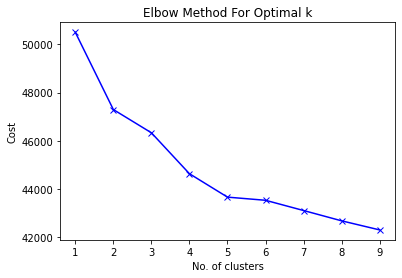

In [50]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
# Building the model with 5 clusters
kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 145, cost: 45755.0
Run 1, iteration: 2/100, moves: 0, cost: 45755.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1585, cost: 44071.0
Run 2, iteration: 2/100, moves: 57, cost: 44071.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 197, cost: 46060.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2037, cost: 43818.0
Run 4, iteration: 2/100, moves: 9, cost: 43818.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 759, cost: 46121.0
Run 5, iteration: 2/100, moves: 156, cost: 46121.0
Best run was number 4


array([1, 0, 0, ..., 4, 1, 4], dtype=uint16)

In [52]:
data.insert(0, "Cluster", clusters, True)
data

,Cluster,mass,fell_found,year,latitude,longitude,group,chondrite,type,lc_sample
1,1,21.0,Fell,1880,50.77500,6.08333,L,Chondrite,Stony,11
2,0,720.0,Fell,1951,56.18333,10.23333,H,Chondrite,Stony,1
3,0,331.0,Found,1982,26.80000,-105.41667,H,Chondrite,Stony,2
4,0,21100.0,Found,1951,36.30000,-104.28333,H,Chondrite,Stony,13
5,0,107000.0,Fell,1952,54.21667,-113.00000,EH,Chondrite,Stony,1
...,...,...,...,...,...,...,...,...,...,...
9893,1,7700.0,Found,2011,19.15823,54.88668,L,Chondrite,Stony,11
9894,1,11.1,Found,2012,34.82793,-118.14640,LL,Chondrite,Stony,11
9895,4,254.0,Found,2011,40.95465,-118.49693,H,Chondrite,Stony,11
9896,1,2854.0,Found,2012,40.89201,-118.55319,L,Chondrite,Stony,11


In [62]:
data

,Cluster,mass,fell_found,year,latitude,longitude,group,chondrite,type,lc_sample
1,1,21.0,Fell,1880,50.77500,6.08333,L,Chondrite,Stony,11
2,0,720.0,Fell,1951,56.18333,10.23333,H,Chondrite,Stony,1
3,0,331.0,Found,1982,26.80000,-105.41667,H,Chondrite,Stony,2
4,0,21100.0,Found,1951,36.30000,-104.28333,H,Chondrite,Stony,13
5,0,107000.0,Fell,1952,54.21667,-113.00000,EH,Chondrite,Stony,1
...,...,...,...,...,...,...,...,...,...,...
9893,1,7700.0,Found,2011,19.15823,54.88668,L,Chondrite,Stony,11
9894,1,11.1,Found,2012,34.82793,-118.14640,LL,Chondrite,Stony,11
9895,4,254.0,Found,2011,40.95465,-118.49693,H,Chondrite,Stony,11
9896,1,2854.0,Found,2012,40.89201,-118.55319,L,Chondrite,Stony,11


In [65]:
cluster0 = data[data.Cluster == 0]
cluster1 = data[data.Cluster == 1]
cluster2 = data[data.Cluster == 2]
cluster3 = data[data.Cluster == 3]
cluster4 = data[data.Cluster == 4]



In [66]:
len(cluster0)

1611

In [67]:
len(cluster1)


3616

In [68]:
len(cluster2)


609

In [69]:
len(cluster3)

807

In [70]:
len(cluster4)

3204

In [76]:
clt = [cluster0, cluster1, cluster2, cluster3, cluster4]

chart = data.groupby(['Cluster']).mean()
chart['Dimensions'] = [size(cluster0), size(cluster1),size(cluster2),size(cluster3),size(cluster4)]
chart


,mass,year,latitude,longitude,lc_sample,Dimensions
Cluster,,,,,,
0,17689.947076,1947.337058,22.869470,-11.117629,5.447548,16110
1,4707.382640,1989.468750,20.328707,20.374422,10.535398,36160
2,50250.343381,1970.609195,22.291531,12.765870,10.037767,6090
3,560406.663494,1919.068154,21.000937,-17.874565,6.718711,8070
4,2229.302993,2000.121099,18.983161,22.148576,11.000936,32040


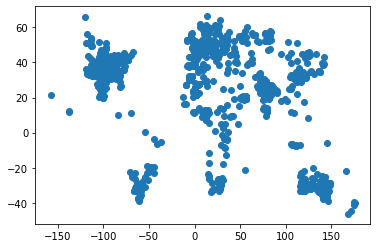

In [77]:
plt.scatter(cluster0.longitude,cluster0.latitude)

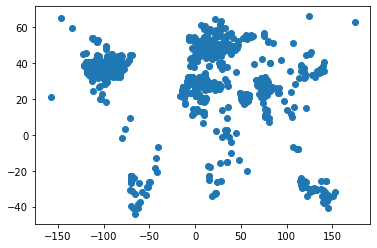

In [78]:
plt.scatter(cluster1.longitude,cluster1.latitude)

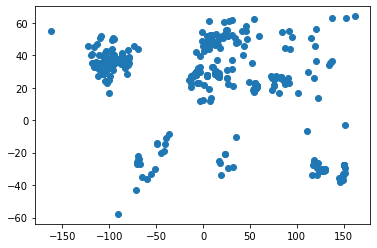

In [79]:
plt.scatter(cluster2.longitude,cluster2.latitude)

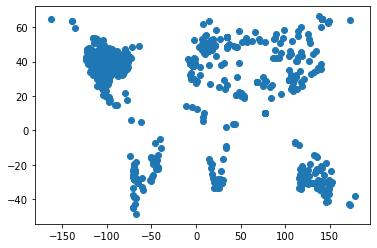

In [80]:
plt.scatter(cluster3.longitude,cluster3.latitude)

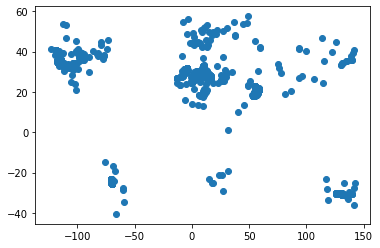

In [81]:
plt.scatter(cluster4.longitude,cluster4.latitude)

In [82]:
cluster0.to_csv('data/results/kmodes_cluster0.csv')
cluster1.to_csv('data/results/kmodes_cluster1.csv')
cluster2.to_csv('data/results/kmodes_cluster2.csv')
cluster3.to_csv('data/results/kmodes_cluster3.csv')
cluster4.to_csv('data/results/kmodes_cluster4.csv')

